In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(600, 800, 3)


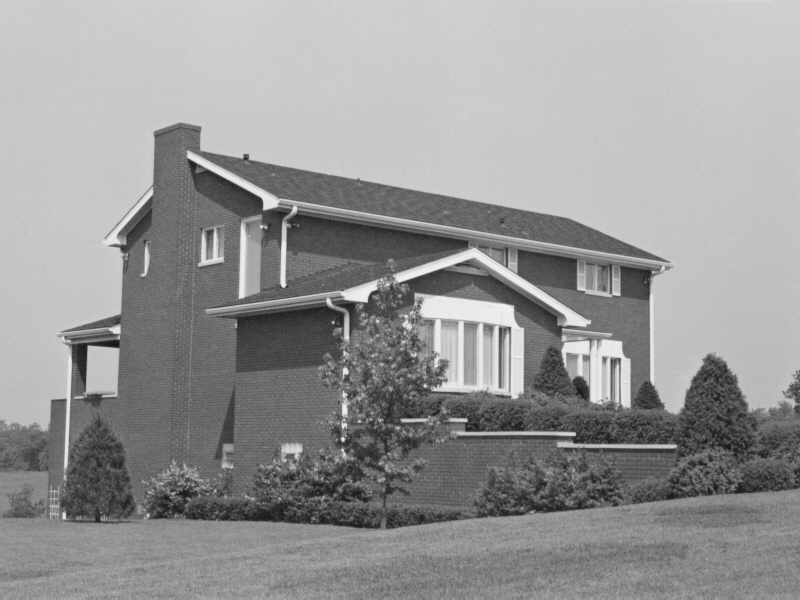

In [2]:
img = cv2.imread('/content/gdrive/My Drive/images/home3.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gimg1)

In [3]:
img2 = img.copy()

케니 알고리즘 (엣지)

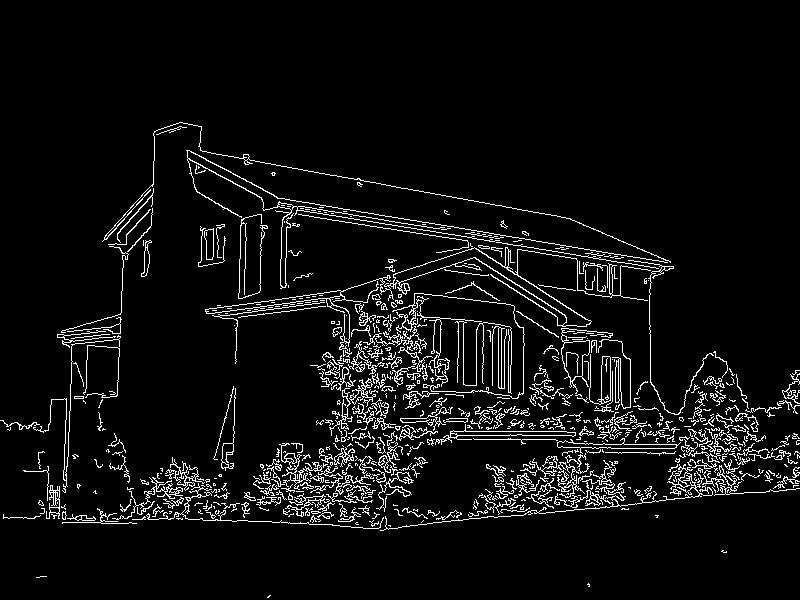

In [4]:
edges = cv2.Canny(gimg1, 100, 200)
cv2_imshow(edges)

모든 엣지 공간에서 파라미터를 누적

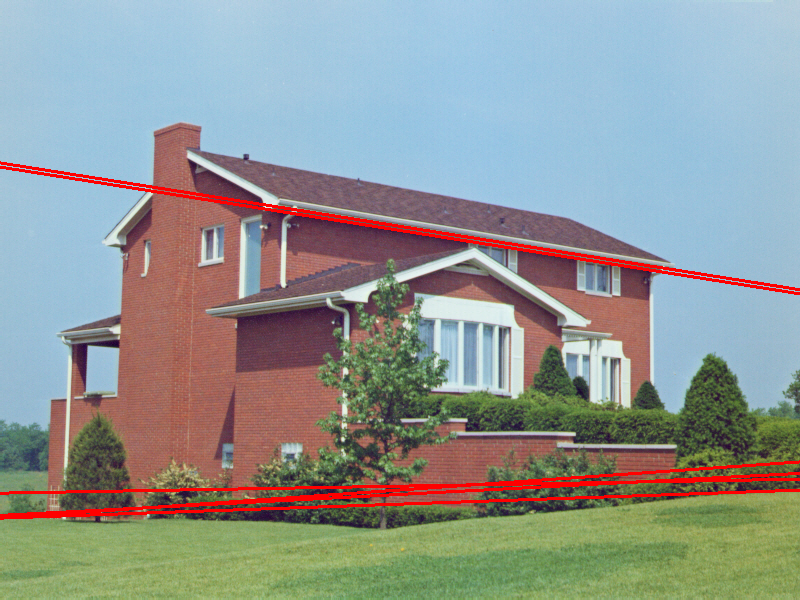

In [5]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho

  x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
  x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))

  cv2.line(img2, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(img2)
